In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
pd.read_parquet('log/0a0c0854b2f347abb5d4d9220b66a165-0.parquet')

,date,open,high,low,close,volume,company
0,2022-01-03 09:15:00+05:30,25448.00,25448.00,25361.00,25401.85,31,121345
1,2022-01-03 09:16:00+05:30,25401.85,25439.80,25358.55,25371.55,16,121345
2,2022-01-03 09:17:00+05:30,25371.55,25439.95,25371.55,25439.95,12,121345
3,2022-01-03 09:18:00+05:30,25439.95,25498.95,25417.65,25450.75,10,121345
4,2022-01-03 09:19:00+05:30,25450.75,25611.95,25432.80,25607.05,12,121345
...,...,...,...,...,...,...,...
4739,2022-09-19 13:14:00+05:30,64.95,65.00,64.85,64.90,415149,1304833
4740,2022-09-19 13:15:00+05:30,64.95,65.00,64.90,64.95,119153,1304833
4741,2022-09-19 13:16:00+05:30,65.00,65.15,65.00,65.15,303974,1304833
4742,2022-09-19 13:17:00+05:30,65.10,65.15,64.95,65.00,331136,1304833


In [2]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
index_col=0, parse_dates=True).dropna()

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [4]:
data = pd.DataFrame(raw['EUR='])
data.rename(columns = {'EUR=':'price'},inplace=True)

In [5]:
data['SMA1']  = data.price.rolling(42).mean()
data['SMA2']  = data.price.rolling(252).mean()

In [6]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

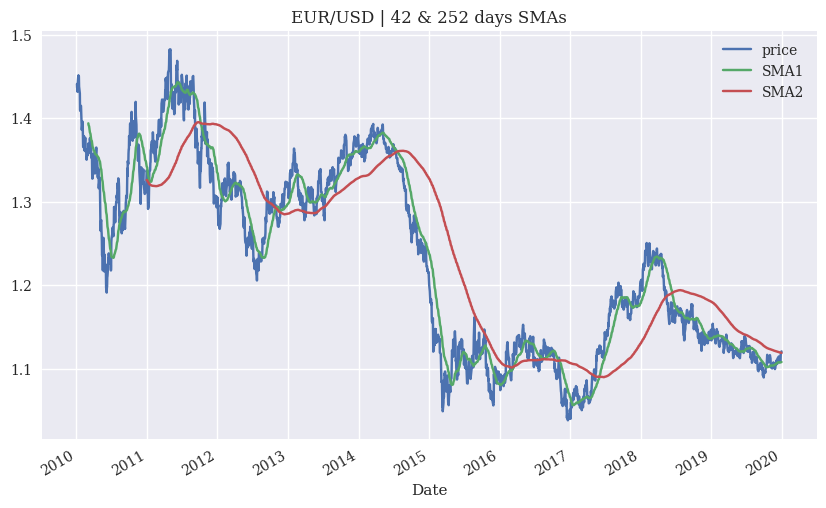

In [7]:
data.plot(title='EUR/USD | 42 & 252 days SMAs',figsize=(10, 6))

In [8]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1 )
data.dropna(inplace = True)

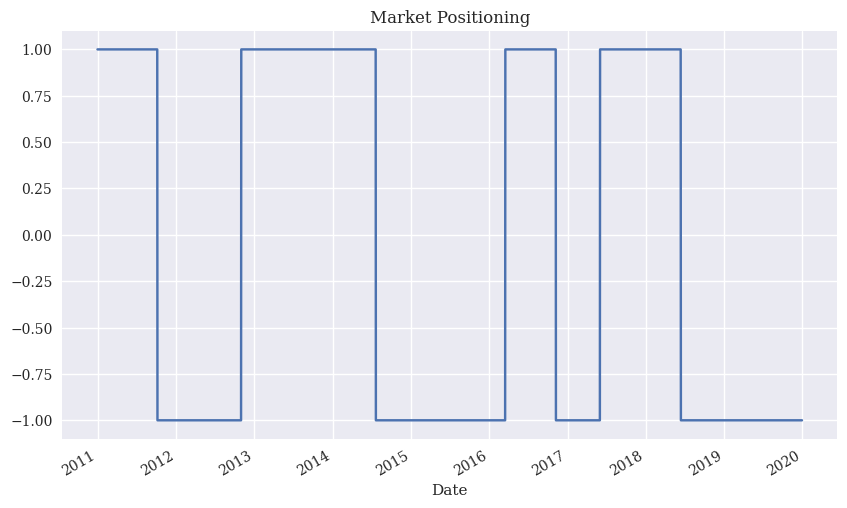

In [9]:
data['position'].plot(ylim=[-1.1, 1.1],
title='Market Positioning',
figsize=(10, 6))

In [10]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

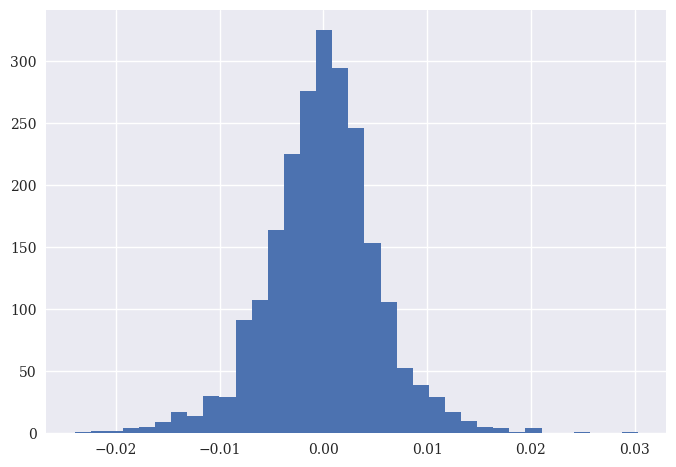

In [11]:
data['returns'].hist(bins = 35)